# Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import tqdm
warnings.filterwarnings("ignore")

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# EDA

## Basic EDA 

### Distinguish attributes

In [2]:
sherpa = pd.read_csv('Sherpa_dataset.csv',low_memory=False)
sherpa.head()

,Deliveries ID,Deliveries User ID,Customers Category Name,Deliveries State Name,Deliveries Delivery Option Name,Deliveries Distance In Meters,Deliveries Duration In Seconds,Deliveries Amount,Deliveries Delivery Price,Deliveries Refund Amount,...,Deliveries Fragile (Yes / No),Deliveries Future Job (Yes / No),Delivery Details Pickup Postal Code,Delivery Details Pickup State Code,Delivery Details Pickup Metro Area,Delivery Details Pickup Location,Delivery Details Drop Off Postal Code,Delivery Details Drop Off State Code,Delivery Details Drop Off Metro Area,Delivery Details Drop Off Location
0,4669796,27237,Alcohol,closed,1 hour,"1,543",324,$18.51,$13.89,$0.00,...,No,No,3128.0,VIC,Melbourne,"'-37.8190938,145.1221019",3128,VIC,Melbourne,"'-37.828301,145.1272158"
1,4669793,27237,Alcohol,closed,1 hour,730,173,$15.50,$11.63,$0.00,...,No,No,3194.0,VIC,Melbourne,"'-37.9815041,145.0631414",3194,VIC,Melbourne,"'-37.9827959,145.0578174"
2,4662566,45440,Grocery/Food,closed,1 hour,"7,432",699,$40.03,$30.01,$0.00,...,No,Yes,3150.0,VIC,Melbourne,"'-37.8762186,145.1652513",3152,VIC,Melbourne,"'-37.8865433,145.2356254"
3,4669670,27237,Alcohol,closed,1 hour,368,102,$15.50,$11.63,$0.00,...,No,No,3121.0,VIC,Melbourne,"'-37.8254207,144.9942752",3121,VIC,Melbourne,"'-37.826117,144.998071"
4,4667379,45440,Grocery/Food,cancelled,1 hour,"1,303",270,$14.50,$0.00,$14.50,...,No,No,4119.0,QLD,Brisbane,"'-27.606905,153.1100234",4119,QLD,Brisbane,"'-27.6052348,153.1116114"


In [3]:
sherpa.shape

(495261, 38)

In [4]:
# List all the variables
sherpa.keys()

Index(['Deliveries ID', 'Deliveries User ID', 'Customers Category Name',
       'Deliveries State Name', 'Deliveries Delivery Option Name',
       'Deliveries Distance In Meters', 'Deliveries Duration In Seconds',
       'Deliveries Amount', 'Deliveries Delivery Price',
       'Deliveries Refund Amount', 'Delivery Surcharges Amount Increase',
       'Delivery Surcharges Delivery Price Increase',
       'Delivery Surcharges Cbd User', 'Delivery Surcharges Cbd Courier',
       'Delivery Surcharges Multiple Items User',
       'Delivery Surcharges Multiple Items Courier',
       'Delivery Surcharges Wait Time Courier Increase',
       'Delivery Surcharges Wait Time User Increase',
       'Delivery Surcharges Insurance User', 'Deliveries Item Number',
       'Deliveries Heaviest Item Weight', 'Deliveries Total Weight',
       'Deliveries Created Time', 'Deliveries Ready At Time',
       'Deliveries Assigned At Time', 'Deliveries Delivered At Time',
       'Deliveries Deliver for Time', 'De

In [5]:
sherpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495261 entries, 0 to 495260
Data columns (total 38 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   Deliveries ID                                   495261 non-null  int64  
 1   Deliveries User ID                              495261 non-null  int64  
 2   Customers Category Name                         495261 non-null  object 
 3   Deliveries State Name                           495261 non-null  object 
 4   Deliveries Delivery Option Name                 495261 non-null  object 
 5   Deliveries Distance In Meters                   495261 non-null  object 
 6   Deliveries Duration In Seconds                  495261 non-null  object 
 7   Deliveries Amount                               495261 non-null  object 
 8   Deliveries Delivery Price                       495261 non-null  object 
 9   Deliveries Refund Amount  

### Duplicate

In [6]:
# checking duplicates in the dataset

duplicate_rows = sherpa[sherpa.duplicated()]
print('number of duplicated rows: ', duplicate_rows.shape)

number of duplicated rows:  (0, 38)


There is no duplicated rows in the dataset

### Missing values

<AxesSubplot:title={'center':'The number of missing values in each variables'}>

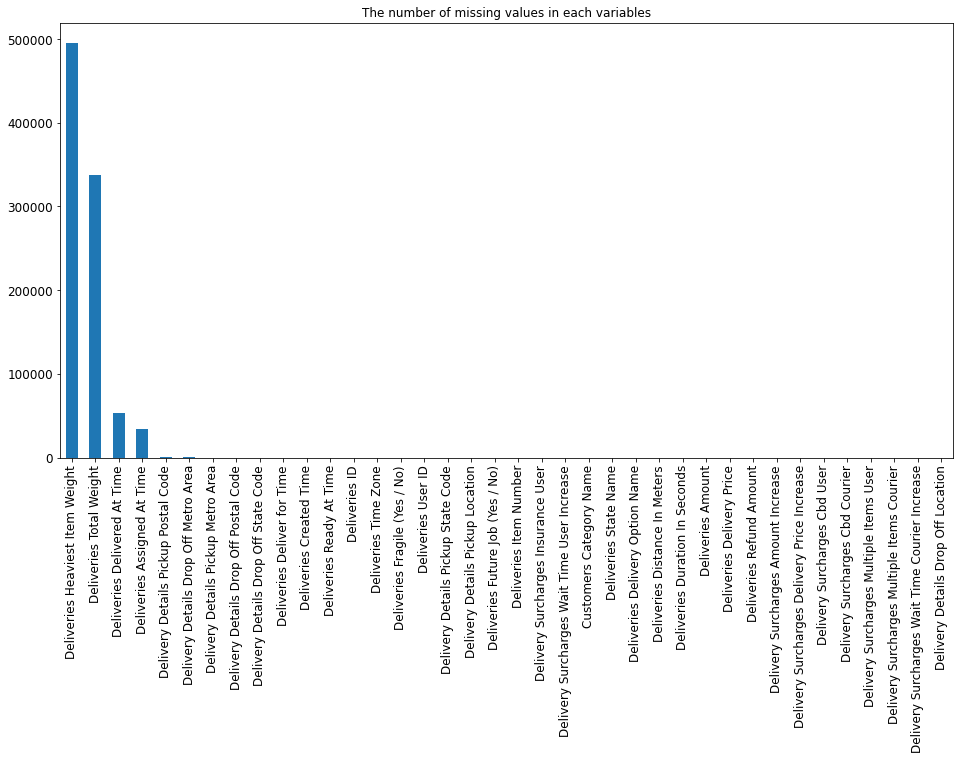

In [7]:
# To see how many missing in each variable

sherpa.isnull().sum().sort_values(ascending=False).plot(kind='bar', 
                                                        figsize = (16,8), 
                                                        title = 'The number of missing values in each variables')

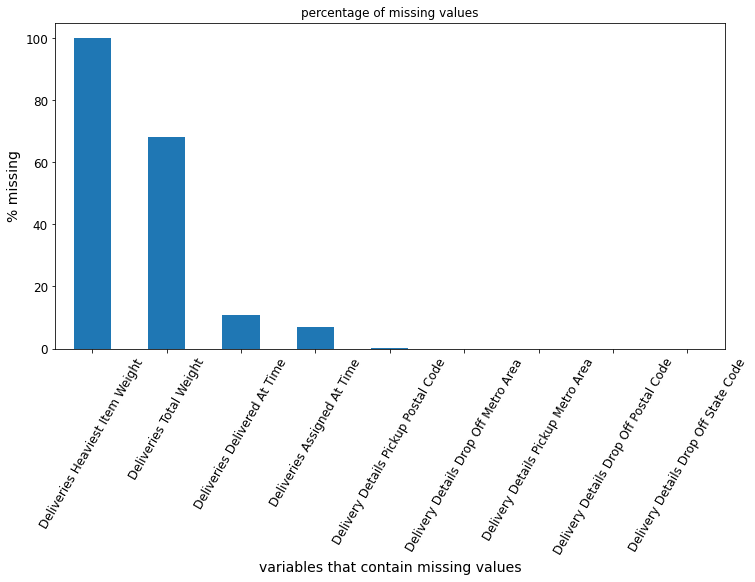

In [8]:
# showing the percentage of missing values

perc = sherpa.isnull().sum()/sherpa.shape[0]*100

perc = perc[perc!=0]

perc.sort_values(ascending = False).plot(kind = 'bar',
                                        figsize = (12,6),
                                        rot = 60,
                                        title = 'percentage of missing values',
                                        ylabel = '% missing',
                                        xlabel = 'variables that contain missing values').get_figure()
plt.savefig('test.pdf',dpi=300)



In [9]:
perc.sort_values(ascending = False)

Deliveries Heaviest Item Weight          99.925898
Deliveries Total Weight                  68.068756
Deliveries Delivered At Time             10.734138
Deliveries Assigned At Time               6.910296
Delivery Details Pickup Postal Code       0.193030
Delivery Details Drop Off Metro Area      0.041392
Delivery Details Pickup Metro Area        0.011105
Delivery Details Drop Off Postal Code     0.005250
Delivery Details Drop Off State Code      0.000202
dtype: float64

! say how we are going to treat these missing

 
high: heaviest item weight, total weight - delete

    low: everything else - impute 

In [10]:
# replace the missing values with median 


# median = housing["total_bedrooms"].median()  
# housing["total_bedrooms"].fillna(median, inplace=True)

In [13]:
missing_col = ['Delivery Details Pickup Postal Code', 'Delivery Details Drop Off Metro Area',
              'Delivery Details Pickup Metro Area', 'Delivery Details Drop Off Postal Code',
              'Delivery Details Drop Off State Code']
 
#Technique 2: Using median to impute the missing values
for i in missing_col:
    sherpa.loc[sherpa.loc[:,i].isnull(),i]=sherpa.loc[:,i].mode()
 
print("count of NULL values after imputation\n")
sherpa.isnull().sum()

count of NULL values after imputation



Deliveries ID                                          0
Deliveries User ID                                     0
Customers Category Name                                0
Deliveries State Name                                  0
Deliveries Delivery Option Name                        0
Deliveries Distance In Meters                          0
Deliveries Duration In Seconds                         0
Deliveries Amount                                      0
Deliveries Delivery Price                              0
Deliveries Refund Amount                               0
Delivery Surcharges Amount Increase                    0
Delivery Surcharges Delivery Price Increase            0
Delivery Surcharges Cbd User                           0
Delivery Surcharges Cbd Courier                        0
Delivery Surcharges Multiple Items User                0
Delivery Surcharges Multiple Items Courier             0
Delivery Surcharges Wait Time Courier Increase         0
Delivery Surcharges Wait Time U

In [14]:
# f_sherpa['Delivery Details Drop Off Postal Code'].unique()

### Extracting target variable - DIFOT

DIFOT is calculated by comparing ‘Deliveries Delivered at Time’ & ‘Deliveries Delivered for Time’

Also DIFOT should only be calculated if the delivery is indicated as "closed" under "Deliverise State Name", and have a valid record of ‘Deliveries Delivered at Time’ (no missing)

`Step1: Get the data ready for DIFOT calcualtion`

In [15]:
# filter out the missing values under "deliverues delivered at time"

f_sherpa = sherpa[~sherpa['Deliveries Delivered At Time'].isnull()]

sherpa.shape

(495261, 38)

In [16]:
# Confirm there is no missing values under 'Deliveries Delivered At Time'

f_sherpa['Deliveries Delivered At Time'].isnull().sum()/f_sherpa.shape[0]

0.0

In [17]:
# checking unique values for "deliveries state name"

f_sherpa['Deliveries State Name'].unique()

array(['closed', 'failed', 'cancelled', 'refunded'], dtype=object)

In [18]:
# filter out "canceled, failed, refunded" under 'deliveries state name'

f_sherpa = f_sherpa[f_sherpa['Deliveries State Name']=='closed']

In [19]:
# since 'deliveries state name' only has 1 value (closed), we will delete this column for our futher analysis

f_sherpa.drop(columns='Deliveries State Name', inplace=True)
f_sherpa.keys()

Index(['Deliveries ID', 'Deliveries User ID', 'Customers Category Name',
       'Deliveries Delivery Option Name', 'Deliveries Distance In Meters',
       'Deliveries Duration In Seconds', 'Deliveries Amount',
       'Deliveries Delivery Price', 'Deliveries Refund Amount',
       'Delivery Surcharges Amount Increase',
       'Delivery Surcharges Delivery Price Increase',
       'Delivery Surcharges Cbd User', 'Delivery Surcharges Cbd Courier',
       'Delivery Surcharges Multiple Items User',
       'Delivery Surcharges Multiple Items Courier',
       'Delivery Surcharges Wait Time Courier Increase',
       'Delivery Surcharges Wait Time User Increase',
       'Delivery Surcharges Insurance User', 'Deliveries Item Number',
       'Deliveries Heaviest Item Weight', 'Deliveries Total Weight',
       'Deliveries Created Time', 'Deliveries Ready At Time',
       'Deliveries Assigned At Time', 'Deliveries Delivered At Time',
       'Deliveries Deliver for Time', 'Deliveries Time Zone',
    

`Step2: Calculate DIFOT`

In [20]:
 # examine delivery for time
f_sherpa['Deliveries Deliver for Time']

0         30/09/2021 23:59
1         30/09/2021 23:59
2         30/09/2021 23:55
3         30/09/2021 23:55
5         30/09/2021 23:54
                ...       
495256      1/07/2021 1:30
495257      1/07/2021 1:00
495258      1/07/2021 1:00
495259      1/07/2021 1:00
495260      1/07/2021 0:00
Name: Deliveries Deliver for Time, Length: 441854, dtype: object

In [21]:
# examine delivery at time
f_sherpa['Deliveries Delivered At Time']

0           1/10/2021 0:55
1         30/09/2021 23:13
2           1/10/2021 0:08
3         30/09/2021 23:23
5         30/09/2021 23:28
                ...       
495256    30/06/2021 22:17
495257    30/06/2021 23:36
495258    30/06/2021 22:50
495259    30/06/2021 23:41
495260      1/07/2021 0:26
Name: Deliveries Delivered At Time, Length: 441854, dtype: object

Because the data format is not in pandas date format, we need to convert it in order to calculate the difference.

In [22]:
# calculating DIFOT

ddft = pd.to_datetime(f_sherpa['Deliveries Deliver for Time'], format='%d/%m/%Y %H:%M')
ddat = pd.to_datetime(f_sherpa['Deliveries Delivered At Time'], format='%d/%m/%Y %H:%M')
diff = (ddat - ddft).dt.total_seconds()/60
f_sherpa['DIFOT_Difference'] = diff

f_sherpa['DIFOT']=0
f_sherpa['DIFOT'][f_sherpa['DIFOT_Difference']<15] = 1
f_sherpa.head()

,Deliveries ID,Deliveries User ID,Customers Category Name,Deliveries Delivery Option Name,Deliveries Distance In Meters,Deliveries Duration In Seconds,Deliveries Amount,Deliveries Delivery Price,Deliveries Refund Amount,Delivery Surcharges Amount Increase,...,Delivery Details Pickup Postal Code,Delivery Details Pickup State Code,Delivery Details Pickup Metro Area,Delivery Details Pickup Location,Delivery Details Drop Off Postal Code,Delivery Details Drop Off State Code,Delivery Details Drop Off Metro Area,Delivery Details Drop Off Location,DIFOT_Difference,DIFOT
0,4669796,27237,Alcohol,1 hour,"1,543",324,$18.51,$13.89,$0.00,0.0,...,3128.0,VIC,Melbourne,"'-37.8190938,145.1221019",3128,VIC,Melbourne,"'-37.828301,145.1272158",56.0,0
1,4669793,27237,Alcohol,1 hour,730,173,$15.50,$11.63,$0.00,0.0,...,3194.0,VIC,Melbourne,"'-37.9815041,145.0631414",3194,VIC,Melbourne,"'-37.9827959,145.0578174",-46.0,1
2,4662566,45440,Grocery/Food,1 hour,"7,432",699,$40.03,$30.01,$0.00,0.0,...,3150.0,VIC,Melbourne,"'-37.8762186,145.1652513",3152,VIC,Melbourne,"'-37.8865433,145.2356254",13.0,1
3,4669670,27237,Alcohol,1 hour,368,102,$15.50,$11.63,$0.00,0.0,...,3121.0,VIC,Melbourne,"'-37.8254207,144.9942752",3121,VIC,Melbourne,"'-37.826117,144.998071",-32.0,1
5,4669731,27237,Alcohol,1 hour,"4,221",483,$18.00,$13.50,$0.00,0.0,...,4017.0,QLD,Brisbane,"'-27.3201232,153.0413416",4017,QLD,Brisbane,"'-27.3327807,153.0572797",-26.0,1


In [23]:
# drop 'Deliveries Delivered At Time' & 'Deliveries For Time' because they are used to calculate the target variable
# to avoid multi-collinearity

f_sherpa.drop(columns=['Deliveries Deliver for Time', 'Deliveries Delivered At Time'], inplace=True)
f_sherpa.shape

(441854, 37)

`Step3: Examine 'DIFOT'`

<AxesSubplot:title={'center':'DIFOT vs no DIFOT'}, ylabel='count'>

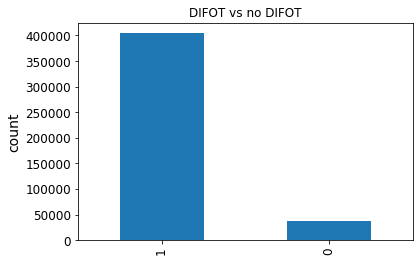

In [24]:
# Visualise DIFOT 

f_sherpa['DIFOT'].value_counts().plot(kind='bar',
                                     title = 'DIFOT vs no DIFOT',
                                     ylabel = 'count')


In [25]:
# DIFOT rate

amount_difot = f_sherpa['DIFOT'].value_counts() 
difot_rate = amount_difot[1]/f_sherpa.shape[0]*100
print("The current DIFOT rate of all Sherpa's delivery is {:.2f}%".format(difot_rate))

The current DIFOT rate of all Sherpa's delivery is 91.58%


Summary:
1. DIFOT is an imbalanced feature

### Delete unnecessary data

In [26]:
f_sherpa.drop(columns=['Deliveries ID', 'Deliveries User ID'], inplace=True)
f_sherpa.shape

(441854, 35)

Now we have 37 variables left in the dataset. Of which, 'DIFOT' is our target variabels, that left us with 35 predictors (x) + 1 target (y)

## Feature engineering

### Classify variables into different types

In [27]:
f_sherpa.dtypes

Customers Category Name                            object
Deliveries Delivery Option Name                    object
Deliveries Distance In Meters                      object
Deliveries Duration In Seconds                     object
Deliveries Amount                                  object
Deliveries Delivery Price                          object
Deliveries Refund Amount                           object
Delivery Surcharges Amount Increase               float64
Delivery Surcharges Delivery Price Increase       float64
Delivery Surcharges Cbd User                      float64
Delivery Surcharges Cbd Courier                   float64
Delivery Surcharges Multiple Items User           float64
Delivery Surcharges Multiple Items Courier        float64
Delivery Surcharges Wait Time Courier Increase      int64
Delivery Surcharges Wait Time User Increase       float64
Delivery Surcharges Insurance User                float64
Deliveries Item Number                              int64
Deliveries Hea

In [28]:
f_sherpa.nunique()

Customers Category Name                               23
Deliveries Delivery Option Name                        5
Deliveries Distance In Meters                      26461
Deliveries Duration In Seconds                      3537
Deliveries Amount                                   1443
Deliveries Delivery Price                           2812
Deliveries Refund Amount                               1
Delivery Surcharges Amount Increase                   17
Delivery Surcharges Delivery Price Increase           95
Delivery Surcharges Cbd User                           9
Delivery Surcharges Cbd Courier                       33
Delivery Surcharges Multiple Items User               39
Delivery Surcharges Multiple Items Courier           107
Delivery Surcharges Wait Time Courier Increase        13
Delivery Surcharges Wait Time User Increase           22
Delivery Surcharges Insurance User                     2
Deliveries Item Number                                41
Deliveries Heaviest Item Weight

`Identifying problems in 'object'`

In [29]:
f_sherpa.dtypes[f_sherpa.dtypes=='object']

Customers Category Name                  object
Deliveries Delivery Option Name          object
Deliveries Distance In Meters            object
Deliveries Duration In Seconds           object
Deliveries Amount                        object
Deliveries Delivery Price                object
Deliveries Refund Amount                 object
Deliveries Created Time                  object
Deliveries Ready At Time                 object
Deliveries Assigned At Time              object
Deliveries Time Zone                     object
Deliveries Fragile (Yes / No)            object
Deliveries Future Job (Yes / No)         object
Delivery Details Pickup State Code       object
Delivery Details Pickup Metro Area       object
Delivery Details Pickup Location         object
Delivery Details Drop Off Postal Code    object
Delivery Details Drop Off State Code     object
Delivery Details Drop Off Metro Area     object
Delivery Details Drop Off Location       object
dtype: object

Pandas can't always tell the true data type of each variable. therefore we need to manually investigate the type. we can check if a numerical variable is mistakenly classified as an 'object' using the nunique() function. Since a categorical variable would not usually have too many unique values, so they are easily identifiable

In [30]:
# to check which categorical variable is actually numerical variable

cat_colmuns = f_sherpa.dtypes[f_sherpa.dtypes=='object'].index
f_sherpa[cat_colmuns].nunique()

Customers Category Name                      23
Deliveries Delivery Option Name               5
Deliveries Distance In Meters             26461
Deliveries Duration In Seconds             3537
Deliveries Amount                          1443
Deliveries Delivery Price                  2812
Deliveries Refund Amount                      1
Deliveries Created Time                   90071
Deliveries Ready At Time                  54947
Deliveries Assigned At Time               71716
Deliveries Time Zone                          7
Deliveries Fragile (Yes / No)                 2
Deliveries Future Job (Yes / No)              2
Delivery Details Pickup State Code            7
Delivery Details Pickup Metro Area           13
Delivery Details Pickup Location           9042
Delivery Details Drop Off Postal Code      1019
Delivery Details Drop Off State Code          7
Delivery Details Drop Off Metro Area         15
Delivery Details Drop Off Location       219257
dtype: int64

In [31]:
# to examine what is the problem that caused misclassification 

cols = ['Deliveries Distance In Meters', # have commas 
        'Deliveries Duration In Seconds', # commas
        'Deliveries Amount', # dollar sign $
        'Deliveries Delivery Price', # dollar sign $
        'Delivery Details Drop Off Postal Code', # entry '3064،' had a symbol
        'Deliveries Refund Amount', # only 1 unique value
        'Delivery Details Drop Off State Code', 
        'Delivery Details Drop Off Metro Area']

for col in cols:
    print(f_sherpa[col].unique())

['1,543' '730' '7,432' ... '23,015' '38,472' '89,079']
['324' '173' '699' ... '4,437' '2,957' '4,861']
['$18.51' '$15.50' '$40.03' ... '$30.55' '$37.66' '$57.70']
['$13.89' '$11.63' '$30.01' ... '$88.56' '$23.42' '$43.28']
['3128' '3194' '3152' ... '6983' '7019' '3799']
['$0.00']
['VIC' 'QLD' 'NSW' 'WA' 'ACT' 'SA' 'TAS' nan]
['Melbourne' 'Brisbane' 'Albury' 'Sydney' 'Gold Coast' 'Geelong' 'Gosford'
 'Sunshine Coast' 'Perth' 'Canberra' 'Adelaide' 'Hobart' 'Launceston' nan
 'Wollongong' 'Newcastle']


In [32]:
# correct the data type for the following variables

f_sherpa['Deliveries Distance In Meters'] = f_sherpa['Deliveries Distance In Meters'].str.replace(',','').astype(np.float64)

f_sherpa['Deliveries Duration In Seconds'] = f_sherpa['Deliveries Duration In Seconds'].str.replace(',','').astype(np.float64)

f_sherpa['Deliveries Amount'] = f_sherpa['Deliveries Amount'].str.replace('$','').astype(np.float64)

f_sherpa['Deliveries Delivery Price'] = f_sherpa['Deliveries Delivery Price'].str.replace('$','').astype(np.float64)

f_sherpa['Delivery Details Drop Off Postal Code'] = f_sherpa['Delivery Details Drop Off Postal Code'].str.replace('3064،', '3064').astype(np.float64)




# delete 'Deliveries Refund Amount'

f_sherpa.drop(columns = 'Deliveries Refund Amount', inplace = True)

In [33]:
f_sherpa.dtypes

Customers Category Name                            object
Deliveries Delivery Option Name                    object
Deliveries Distance In Meters                     float64
Deliveries Duration In Seconds                    float64
Deliveries Amount                                 float64
Deliveries Delivery Price                         float64
Delivery Surcharges Amount Increase               float64
Delivery Surcharges Delivery Price Increase       float64
Delivery Surcharges Cbd User                      float64
Delivery Surcharges Cbd Courier                   float64
Delivery Surcharges Multiple Items User           float64
Delivery Surcharges Multiple Items Courier        float64
Delivery Surcharges Wait Time Courier Increase      int64
Delivery Surcharges Wait Time User Increase       float64
Delivery Surcharges Insurance User                float64
Deliveries Item Number                              int64
Deliveries Heaviest Item Weight                   float64
Deliveries Tot

Summary: 
1. 'Deliveries Distance In Meters',
'Deliveries Duration In Seconds',
'Deliveries Amount',
'Deliveries Delivery Price',
'Delivery Details Drop Off Postal Code'
have been converted to float64 type
2. Delivery Details Drop Off Metro Area & Delivery Details Drop Off Location have missing value shown as 'nan'
3. 'Deliveries Refund Amount' only has 1 unique value ($0.00), which we might delete 

`Identifying problems in the 'float64'`

In [34]:
flo_colmuns = f_sherpa.dtypes[f_sherpa.dtypes=='float64'].index
f_sherpa[flo_colmuns].nunique()

Deliveries Distance In Meters                  26461
Deliveries Duration In Seconds                  3537
Deliveries Amount                               1443
Deliveries Delivery Price                       2812
Delivery Surcharges Amount Increase               17
Delivery Surcharges Delivery Price Increase       95
Delivery Surcharges Cbd User                       9
Delivery Surcharges Cbd Courier                   33
Delivery Surcharges Multiple Items User           39
Delivery Surcharges Multiple Items Courier       107
Delivery Surcharges Wait Time User Increase       22
Delivery Surcharges Insurance User                 2
Deliveries Heaviest Item Weight                   26
Deliveries Total Weight                          120
Delivery Details Pickup Postal Code              812
Delivery Details Drop Off Postal Code           1018
DIFOT_Difference                                 852
dtype: int64

In [35]:
f_sherpa['Delivery Surcharges Insurance User'].value_counts()

0.00    438572
2.75      3282
Name: Delivery Surcharges Insurance User, dtype: int64

Summary:
1. use 'Delivery Surcharges Insurance User' as a categorical variable as it is Yes/No on the delivery insurance

`Identifying problems in 'int64'`

In [36]:
int_colmuns = f_sherpa.dtypes[f_sherpa.dtypes=='int64'].index
f_sherpa[int_colmuns].nunique()

Delivery Surcharges Wait Time Courier Increase    13
Deliveries Item Number                            41
DIFOT                                              2
dtype: int64

no probelms here

__`Categorise features`__

In [37]:
# dummy encoding 'Delivery Surcharges Insurance User'

f_sherpa['Delivery Surcharges Insurance User'] = f_sherpa['Delivery Surcharges Insurance User'].replace([0.00, 2.75], [0, 1])
f_sherpa['Delivery Surcharges Insurance User'].value_counts()

0.0    438572
1.0      3282
Name: Delivery Surcharges Insurance User, dtype: int64

In [38]:
columns = f_sherpa.columns.tolist()

time_feature = ['Deliveries Created Time',
                'Deliveries Ready At Time',
                'Deliveries Assigned At Time',]

locate_features = ['Delivery Details Pickup Postal Code',
                'Delivery Details Pickup State Code',
                'Delivery Details Pickup Metro Area',
                'Delivery Details Pickup Location',
                'Delivery Details Drop Off Postal Code',
                'Delivery Details Drop Off State Code',
                'Delivery Details Drop Off Metro Area',
                'Delivery Details Drop Off Location',]


other_features = list(set(columns) - set(time_feature)  - set(locate_features))
other_features

['Deliveries Future Job (Yes / No)',
 'Delivery Surcharges Delivery Price Increase',
 'DIFOT',
 'Deliveries Heaviest Item Weight',
 'Delivery Surcharges Multiple Items Courier',
 'Delivery Surcharges Cbd User',
 'Delivery Surcharges Cbd Courier',
 'Delivery Surcharges Wait Time Courier Increase',
 'Deliveries Delivery Option Name',
 'Deliveries Fragile (Yes / No)',
 'Deliveries Item Number',
 'Delivery Surcharges Wait Time User Increase',
 'Deliveries Distance In Meters',
 'Delivery Surcharges Multiple Items User',
 'Customers Category Name',
 'Delivery Surcharges Amount Increase',
 'Deliveries Time Zone',
 'Deliveries Total Weight',
 'Delivery Surcharges Insurance User',
 'Deliveries Amount',
 'Deliveries Duration In Seconds',
 'Deliveries Delivery Price',
 'DIFOT_Difference']

### Detect outliers

In [39]:
f_sherpa.describe()

,Deliveries Distance In Meters,Deliveries Duration In Seconds,Deliveries Amount,Deliveries Delivery Price,Delivery Surcharges Amount Increase,Delivery Surcharges Delivery Price Increase,Delivery Surcharges Cbd User,Delivery Surcharges Cbd Courier,Delivery Surcharges Multiple Items User,Delivery Surcharges Multiple Items Courier,Delivery Surcharges Wait Time Courier Increase,Delivery Surcharges Wait Time User Increase,Delivery Surcharges Insurance User,Deliveries Item Number,Deliveries Heaviest Item Weight,Deliveries Total Weight,Delivery Details Pickup Postal Code,Delivery Details Drop Off Postal Code,DIFOT_Difference,DIFOT
count,441854.000000,441854.000000,441854.000000,441854.000000,441854.000000,441854.000000,441854.000000,441854.000000,441854.000000,441854.000000,441854.000000,441854.000000,441854.000000,441854.000000,257.000000,128195.000000,440961.000000,441833.000000,441854.000000,441854.000000
mean,4912.393329,514.683791,20.170314,15.571205,0.039746,0.163593,0.056929,0.043654,0.266106,0.207538,0.428341,0.571621,0.007428,1.321296,21.404669,21.214821,3464.360238,3467.052633,-32.353572,0.915846
std,5856.571305,388.047557,7.992070,5.999637,0.436038,0.722980,0.413480,0.316286,1.144672,0.875121,2.233025,2.980131,0.085864,0.918459,8.306133,12.747010,1284.888322,1281.642757,80.842670,0.277620
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,1.000000,2000.000000,2000.000000,-1166.000000,0.000000
25%,2024.000000,286.000000,16.500000,12.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000,12.000000,2560.000000,2565.000000,-49.000000,1.000000
50%,3402.000000,421.000000,17.010000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,19.000000,3084.000000,3084.000000,-31.000000,1.000000
75%,5555.000000,612.000000,21.010000,16.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000,28.000000,4151.000000,4152.000000,-10.000000,1.000000
max,99922.000000,5599.000000,166.000000,124.500000,20.000000,50.000000,5.000000,4.200000,88.910000,67.520000,45.000000,60.060000,1.000000,63.000000,84.000000,150.000000,7277.000000,7300.000000,17003.000000,1.000000


In [40]:
f_sherpa.keys()

Index(['Customers Category Name', 'Deliveries Delivery Option Name',
       'Deliveries Distance In Meters', 'Deliveries Duration In Seconds',
       'Deliveries Amount', 'Deliveries Delivery Price',
       'Delivery Surcharges Amount Increase',
       'Delivery Surcharges Delivery Price Increase',
       'Delivery Surcharges Cbd User', 'Delivery Surcharges Cbd Courier',
       'Delivery Surcharges Multiple Items User',
       'Delivery Surcharges Multiple Items Courier',
       'Delivery Surcharges Wait Time Courier Increase',
       'Delivery Surcharges Wait Time User Increase',
       'Delivery Surcharges Insurance User', 'Deliveries Item Number',
       'Deliveries Heaviest Item Weight', 'Deliveries Total Weight',
       'Deliveries Created Time', 'Deliveries Ready At Time',
       'Deliveries Assigned At Time', 'Deliveries Time Zone',
       'Deliveries Fragile (Yes / No)', 'Deliveries Future Job (Yes / No)',
       'Delivery Details Pickup Postal Code',
       'Delivery Details P

In [41]:
# how many in 'Deliveries Distance in Meters' are 1 meter

f_sherpa['Deliveries Distance In Meters'].value_counts()

1491.0     188
1.0        187
5956.0     180
1519.0     172
1806.0     170
          ... 
33373.0      1
40640.0      1
24672.0      1
17507.0      1
89079.0      1
Name: Deliveries Distance In Meters, Length: 26461, dtype: int64

In [42]:
# how many in 'Deliveries Duration In Seconds' are 1 second

c = f_sherpa[f_sherpa['Deliveries Duration In Seconds']==1]
c['Deliveries Duration In Seconds'].sum()

194.0

Summary:
1. 'Deliveries Distance In Meters' & 'Deliveries Duration In Seconds' have min value of 1. Of which, 'Deliveries Distance In Meters' has 187 instances of 1m deliveries while 'Deliveries Duration In Seconds' has xxx instances of 1s deliveries. We need to investigate into this


In [43]:
f_sherpa.shape

(441854, 34)

In [44]:
# Begin to remove these strange values

f_sherpa = f_sherpa[(f_sherpa['Deliveries Duration In Seconds'] != 1) & (f_sherpa['Deliveries Distance In Meters'] != 1)].copy()
f_sherpa.shape

(441660, 34)

### univariate and bivariate analysis 

In [45]:
f_sherpa['Customers Category Name'].value_counts()

Alcohol                  254232
Grocery/Food             130297
Chemist                   17509
Flowers                   15846
Unknown                   10329
Technology                 7612
Cakes & Doughnuts          2135
Gifts                      1284
Fashion                     525
Other                       478
Adult Products              308
Wholesale Food              196
Legal                       191
Public Relation             182
Retail                      150
Homewares                   113
Building/Construction       100
Sweets                       79
Catering                     42
Realestate/Property          24
Courier                      19
Sporting                      8
Printing                      1
Name: Customers Category Name, dtype: int64

In [46]:
perc_customer = f_sherpa['Customers Category Name'].value_counts()/f_sherpa.shape[0]*100

perc_customer

Alcohol                  57.562831
Grocery/Food             29.501653
Chemist                   3.964362
Flowers                   3.587828
Unknown                   2.338677
Technology                1.723498
Cakes & Doughnuts         0.483404
Gifts                     0.290721
Fashion                   0.118870
Other                     0.108228
Adult Products            0.069737
Wholesale Food            0.044378
Legal                     0.043246
Public Relation           0.041208
Retail                    0.033963
Homewares                 0.025585
Building/Construction     0.022642
Sweets                    0.017887
Catering                  0.009510
Realestate/Property       0.005434
Courier                   0.004302
Sporting                  0.001811
Printing                  0.000226
Name: Customers Category Name, dtype: float64

<AxesSubplot:title={'center':'Distribution of customers categorise (before merging)'}, xlabel='industry', ylabel='count'>

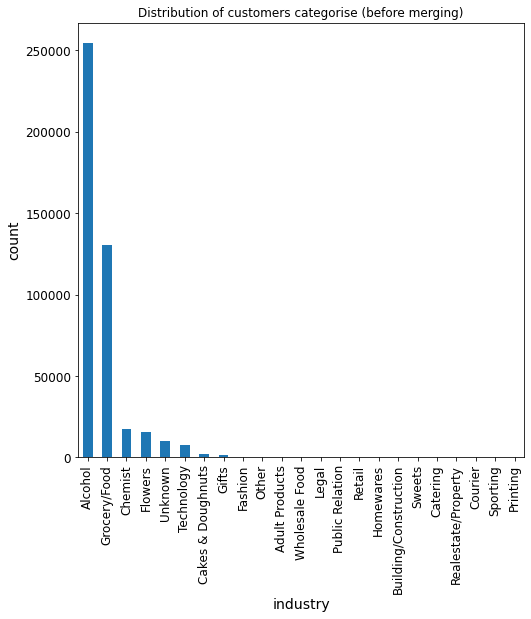

In [47]:
# check customer distribution

f_sherpa['Customers Category Name'].value_counts().plot(figsize = (8,8),kind='bar',
                                                       title = 'Distribution of customers categorise (before merging)',
                                                       xlabel = 'industry',
                                                       ylabel = 'count')



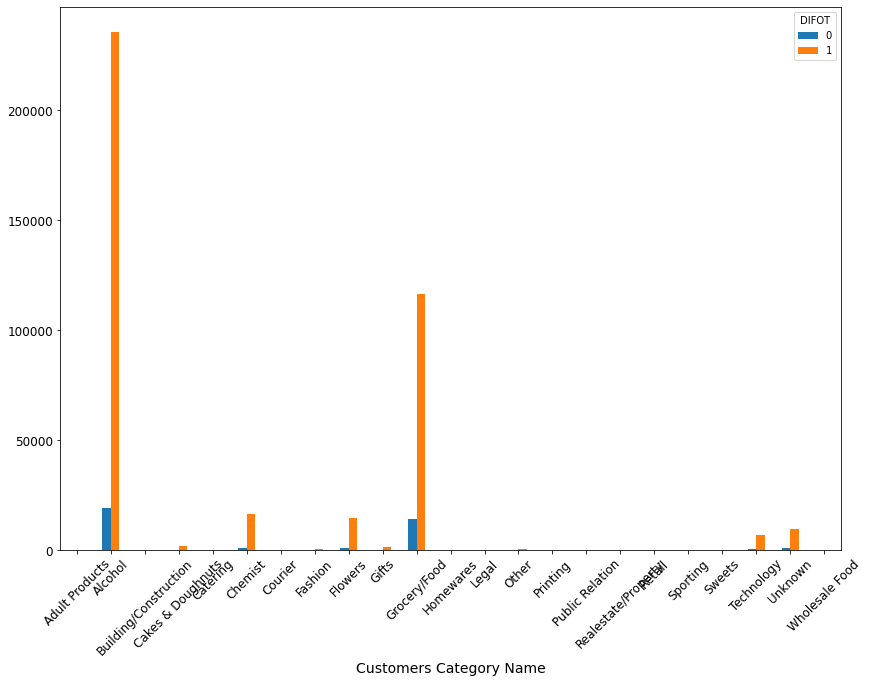

In [48]:
# bar plot - delivery customer name vs DIFOT
#bar = [f_sherpa['Customers Category Name', 'Delivery Surcharges Insurance User']]


crosstb = pd.crosstab(f_sherpa['Customers Category Name'],f_sherpa['DIFOT'])
barplot = crosstb.plot.bar(figsize=(14,10),rot=45)



In [49]:
# merge the categories that have very low counts into 'other'

variable = 'Customers Category Name'

counts = f_sherpa[variable].value_counts() 
for level in counts.index:
    if counts[level] < 1000:
        f_sherpa.loc[f_sherpa[variable]==level, variable] = 'Other'

<AxesSubplot:title={'center':'Distribution of cutomers categories (after merging)'}, xlabel='industry', ylabel='count'>

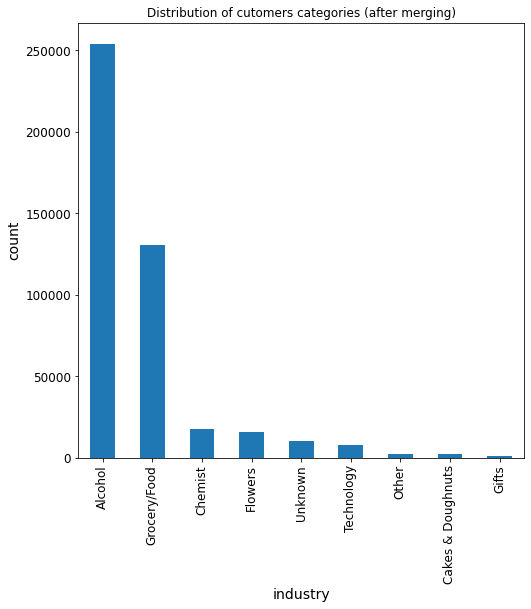

In [50]:
f_sherpa['Customers Category Name'].value_counts().plot(figsize = (8,8),kind='bar',
                                                       title = 'Distribution of cutomers categories (after merging)',
                                                       xlabel = 'industry',
                                                       ylabel = 'count')

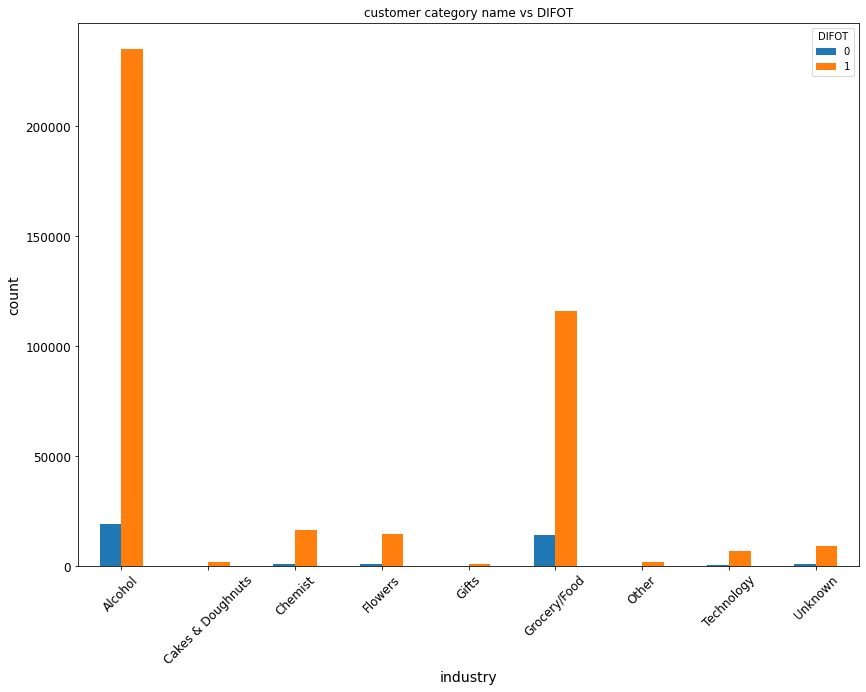

In [68]:
crosstb = pd.crosstab(f_sherpa['Customers Category Name'],f_sherpa['DIFOT'])
barplot = crosstb.plot.bar(figsize=(14,10),rot=45,
                          title = 'customer category name vs DIFOT',
                          xlabel = 'industry',
                          ylabel = 'count')

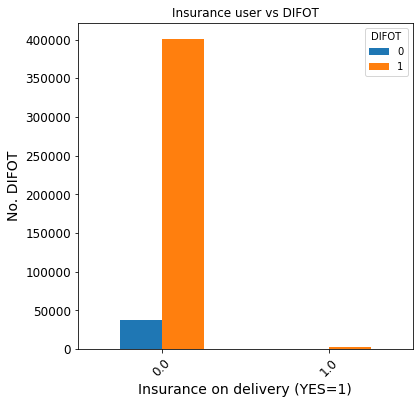

In [52]:
# bar plot - insurance vs DIFOT

crosstb = pd.crosstab(f_sherpa['Delivery Surcharges Insurance User'],f_sherpa['DIFOT'])
barplot = crosstb.plot.bar(figsize=(6,6),
                           rot=45,
                           ylabel = 'No. DIFOT',
                           xlabel = 'Insurance on delivery (YES=1)',
                           title = 'Insurance user vs DIFOT')

In [53]:
f_sherpa.columns

Index(['Customers Category Name', 'Deliveries Delivery Option Name',
       'Deliveries Distance In Meters', 'Deliveries Duration In Seconds',
       'Deliveries Amount', 'Deliveries Delivery Price',
       'Delivery Surcharges Amount Increase',
       'Delivery Surcharges Delivery Price Increase',
       'Delivery Surcharges Cbd User', 'Delivery Surcharges Cbd Courier',
       'Delivery Surcharges Multiple Items User',
       'Delivery Surcharges Multiple Items Courier',
       'Delivery Surcharges Wait Time Courier Increase',
       'Delivery Surcharges Wait Time User Increase',
       'Delivery Surcharges Insurance User', 'Deliveries Item Number',
       'Deliveries Heaviest Item Weight', 'Deliveries Total Weight',
       'Deliveries Created Time', 'Deliveries Ready At Time',
       'Deliveries Assigned At Time', 'Deliveries Time Zone',
       'Deliveries Fragile (Yes / No)', 'Deliveries Future Job (Yes / No)',
       'Delivery Details Pickup Postal Code',
       'Delivery Details P

In [67]:
f_sherpa['Deliveries Item Number'].unique()

array([ 4,  1,  2, 10,  3,  5,  9,  6,  7,  8, 22, 11, 60, 15, 31, 18, 12,
       14, 13, 63, 16, 17, 33, 21, 61, 30, 37, 42, 20, 19, 32, 29, 28, 62,
       34, 23, 44, 24, 45, 27, 25])

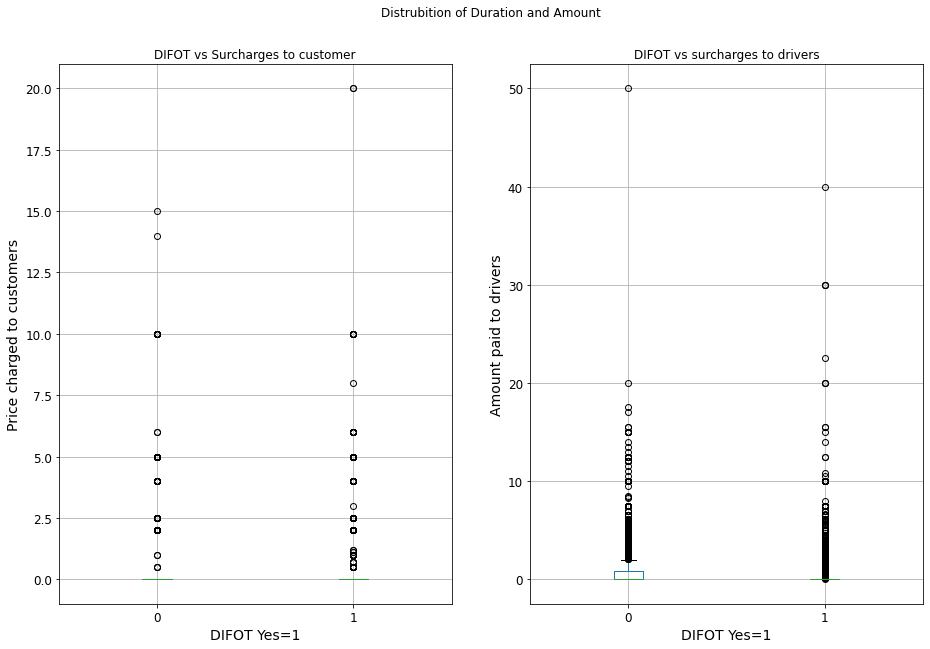

In [54]:
# box plot - 'Delivery Surcharges Amount Increase' & 'Delivery Surcharges Delivery Price Increase'

fig, axs = plt.subplots(1, 2, figsize=(15, 10))

f_sherpa.boxplot('Delivery Surcharges Amount Increase', "DIFOT", ax=axs[0])
axs[0].set_xlabel("DIFOT Yes=1")
axs[0].set_ylabel("Price charged to customers")
axs[0].set_title("DIFOT vs Surcharges to customer")

f_sherpa.boxplot('Delivery Surcharges Delivery Price Increase', "DIFOT", ax=axs[1])
axs[1].set_xlabel("DIFOT Yes=1")
axs[1].set_ylabel("Amount paid to drivers")
axs[1].set_title("DIFOT vs surcharges to drivers")

plt.suptitle("Distrubition of Duration and Amount");

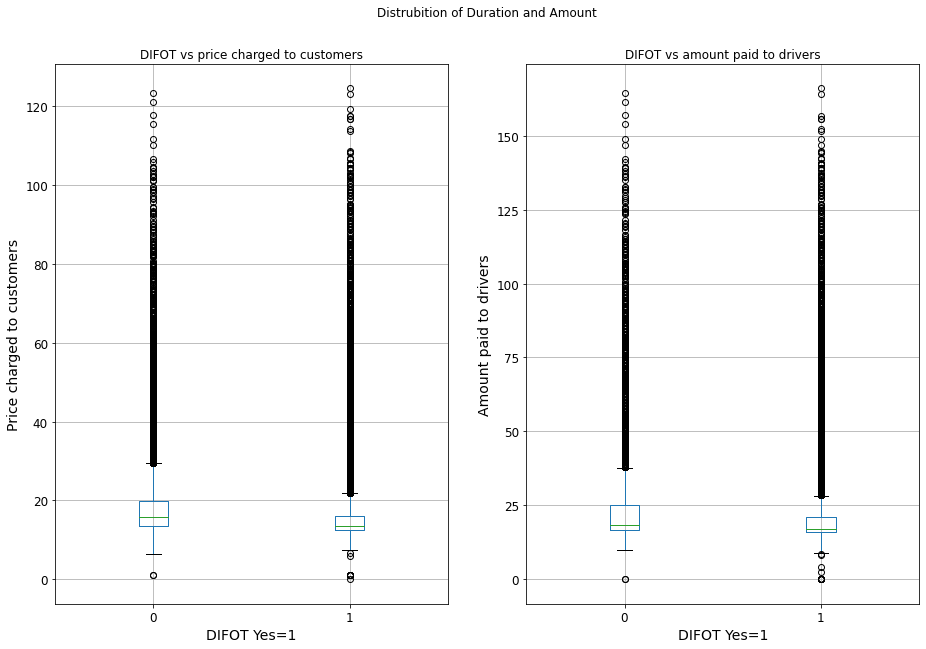

In [55]:
#  - Surcharge vs DIFOT

fig, axs = plt.subplots(1, 2, figsize=(15, 10))

f_sherpa.boxplot("Deliveries Delivery Price", "DIFOT", ax=axs[0])
axs[0].set_xlabel("DIFOT Yes=1")
axs[0].set_ylabel("Price charged to customers")
axs[0].set_title("DIFOT vs price charged to customers")

f_sherpa.boxplot("Deliveries Amount", "DIFOT", ax=axs[1])
axs[1].set_xlabel("DIFOT Yes=1")
axs[1].set_ylabel("Amount paid to drivers")
axs[1].set_title("DIFOT vs amount paid to drivers")

plt.suptitle("Distrubition of Duration and Amount");

<AxesSubplot:xlabel='DIFOT', ylabel='Deliveries Item Number'>

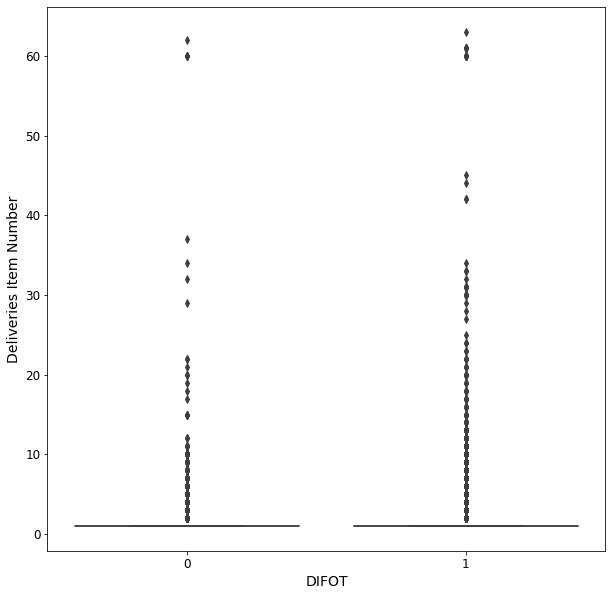

In [56]:
# Delivery item number vs DIFOT

plt.figure(figsize = (10,10))
sns.boxplot(x = 'DIFOT', y= 'Deliveries Item Number', data = f_sherpa)

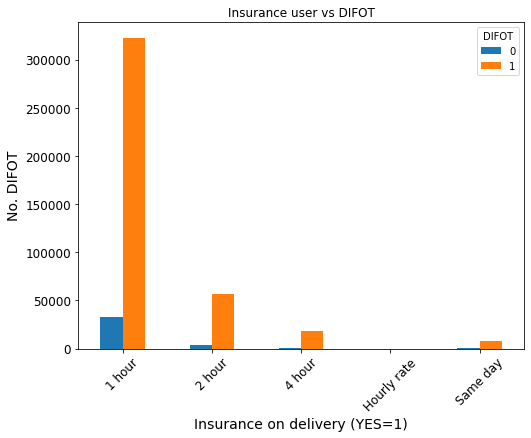

In [57]:
# Delivery option name vs DIFOT

crosstb = pd.crosstab(f_sherpa['Deliveries Delivery Option Name'],f_sherpa['DIFOT'])
barplot = crosstb.plot.bar(figsize=(8,6),
                           rot=45,
                           ylabel = 'No. DIFOT',
                           xlabel = 'Insurance on delivery (YES=1)',
                           title = 'Insurance user vs DIFOT')

In [58]:
f_sherpa.columns

Index(['Customers Category Name', 'Deliveries Delivery Option Name',
       'Deliveries Distance In Meters', 'Deliveries Duration In Seconds',
       'Deliveries Amount', 'Deliveries Delivery Price',
       'Delivery Surcharges Amount Increase',
       'Delivery Surcharges Delivery Price Increase',
       'Delivery Surcharges Cbd User', 'Delivery Surcharges Cbd Courier',
       'Delivery Surcharges Multiple Items User',
       'Delivery Surcharges Multiple Items Courier',
       'Delivery Surcharges Wait Time Courier Increase',
       'Delivery Surcharges Wait Time User Increase',
       'Delivery Surcharges Insurance User', 'Deliveries Item Number',
       'Deliveries Heaviest Item Weight', 'Deliveries Total Weight',
       'Deliveries Created Time', 'Deliveries Ready At Time',
       'Deliveries Assigned At Time', 'Deliveries Time Zone',
       'Deliveries Fragile (Yes / No)', 'Deliveries Future Job (Yes / No)',
       'Delivery Details Pickup Postal Code',
       'Delivery Details P

TypeError: object of type 'NoneType' has no len()

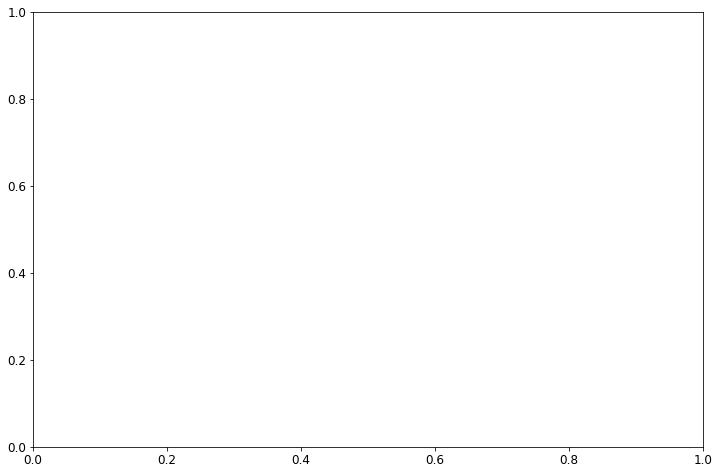

In [59]:
# violin plot

fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
# df_violin["position"] = pd.to_numeric(df_violin["position"],errors='coerce')
sns.catplot(x=f_sherpa["DIFOT"],y=f_sherpa['Deliveries Item Number'])

### Interaction effect

In [ ]:
# see 6810 w3

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
f_sherpa.hist(bins=20, figsize=(20,15)) #doing a histogram on all num variables

Missing values - impute mean/median/mode

No missing:


a few missing:
1. cont - mean/median/mode
2. cat - mode


a lot missing:
1. analyse case by case
2. delete
3. amount/price regression
4. mode
5. dummy to indicate the missing


insurance make diff?
location


# Model building

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


train_indices, test_indices = train_test_split(np.array(f_sherpa.index), test_size=0.2, random_state=0)

f_sherpa_train = f_sherpa.loc[train_indices].copy()
f_sherpa_test = f_sherpa.loc[test_indices].copy() 
f_sherpa_train

In [ ]:
y = f_sherpa_train['DIFOT']
x = f_sherpa_train.drop(columns='DIFOT')
x = sm.add_constant(x)

model = sm.Logit(y, x).fit()

In [ ]:
# possible solution 
# est = sm.OLS(y, X.astype(float)).fit()

In [ ]:
print(model.summary())

In [ ]:
x_test = sm.add_constant(german_test['duration'])
model.predict(x_test)

In [ ]:
plt.scatter(model.fittedvalues, model.resid);

## Normalization

random forest
class_imbalance = true


boosting
